# Install these libraries to use HDFS data
```bash
sudo apt-get install libhdf4.0
pip install pyarrow
pip install fsspec
pip install hdfs
pip install sqlalchemy
pip install pyhive
pip install thrift
sudo apt install libsasl2-dev
pip install sasl
pip install thrift_sasl
```

# References

Exporting data in Hive: https://sparkbyexamples.com/apache-hive/export-hive-table-into-csv-file-with-header/
Querying Hive data: https://www.cdata.com/kb/tech/hive-python-pandas.rst


In [13]:
import pandas as pd
from matplotlib import pyplot as pt
from pyarrow import csv
import pyarrow as pa

from hdfs.ext.kerberos import KerberosClient 

class HDFSLoader:
    def __init__(self, host, port):
        self.port=port
        self.host=host
        self.client=KerberosClient("http://{}:{}".format(host,port),'OPTIONAL')
#         help(self.client)
        print(self.client.status('/'))
    def load_data(self,fileName):
        print(self.client.status(fileName))
        df=None
        with self.client.read(fileName) as cf:
            print(type(cf))
            df=pd.read_csv(cf)
        return df

hdfs_loader = HDFSLoader('172.16.20.10','9870')
df = hdfs_loader.load_data("/srv/uncw/summary4")    
df.head()

{'accessTime': 0, 'blockSize': 0, 'childrenNum': 6, 'fileId': 16385, 'group': 'supergroup', 'length': 0, 'modificationTime': 1655320239819, 'owner': 'root', 'pathSuffix': '', 'permission': '755', 'replication': 0, 'snapshotEnabled': True, 'storagePolicy': 0, 'type': 'DIRECTORY'}
{'accessTime': 0, 'blockSize': 0, 'childrenNum': 2, 'fileId': 19919, 'group': 'supergroup', 'length': 0, 'modificationTime': 1658687478752, 'owner': 'hdoop', 'pathSuffix': '', 'permission': '755', 'replication': 0, 'storagePolicy': 0, 'type': 'DIRECTORY'}


HdfsError: Path is not a file: /srv/uncw/summary4
	at org.apache.hadoop.hdfs.server.namenode.INodeFile.valueOf(INodeFile.java:90)
	at org.apache.hadoop.hdfs.server.namenode.INodeFile.valueOf(INodeFile.java:76)
	at org.apache.hadoop.hdfs.server.namenode.FSDirStatAndListingOp.getBlockLocations(FSDirStatAndListingOp.java:156)
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.getBlockLocations(FSNamesystem.java:2089)
	at org.apache.hadoop.hdfs.server.namenode.NameNodeRpcServer.getBlockLocations(NameNodeRpcServer.java:762)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolServerSideTranslatorPB.getBlockLocations(ClientNamenodeProtocolServerSideTranslatorPB.java:458)
	at org.apache.hadoop.hdfs.protocol.proto.ClientNamenodeProtocolProtos$ClientNamenodeProtocol$2.callBlockingMethod(ClientNamenodeProtocolProtos.java)
	at org.apache.hadoop.ipc.ProtobufRpcEngine2$Server$ProtoBufRpcInvoker.call(ProtobufRpcEngine2.java:604)
	at org.apache.hadoop.ipc.ProtobufRpcEngine2$Server$ProtoBufRpcInvoker.call(ProtobufRpcEngine2.java:572)
	at org.apache.hadoop.ipc.ProtobufRpcEngine2$Server$ProtoBufRpcInvoker.call(ProtobufRpcEngine2.java:556)
	at org.apache.hadoop.ipc.RPC$Server.call(RPC.java:1093)
	at org.apache.hadoop.ipc.Server$RpcCall.run(Server.java:1043)
	at org.apache.hadoop.ipc.Server$RpcCall.run(Server.java:971)
	at java.security.AccessController.doPrivileged(Native Method)
	at javax.security.auth.Subject.doAs(Subject.java:422)
	at org.apache.hadoop.security.UserGroupInformation.doAs(UserGroupInformation.java:1878)
	at org.apache.hadoop.ipc.Server$Handler.run(Server.java:2976)


In [11]:
import pandas as pd
from sqlalchemy import create_engine
cloud_url='127.0.0.1'
from IPython.core.display import display, HTML
# Maximize the window: https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
display(HTML("<style>.container { width:100% !important; }</style>"))
# Query One
engine=create_engine("hive://{}:10000/network_data".format(cloud_url)
                    #, connect_args={'configuration': {'hive.exec.reducers.max': '25'}},
                    )

,attck_cnt,proto
0,137,cbt
1,137,cphb
2,137,idrp
3,137,ipcomp
4,137,ipv6-opts


In [ ]:
# Query #1
df = pd.read_sql("select count(*)  attcK_cnt,proto from unsw where Label=binary('1') group by proto", engine)
df.head()

Text(0, 0.5, 'Number of Attacks')

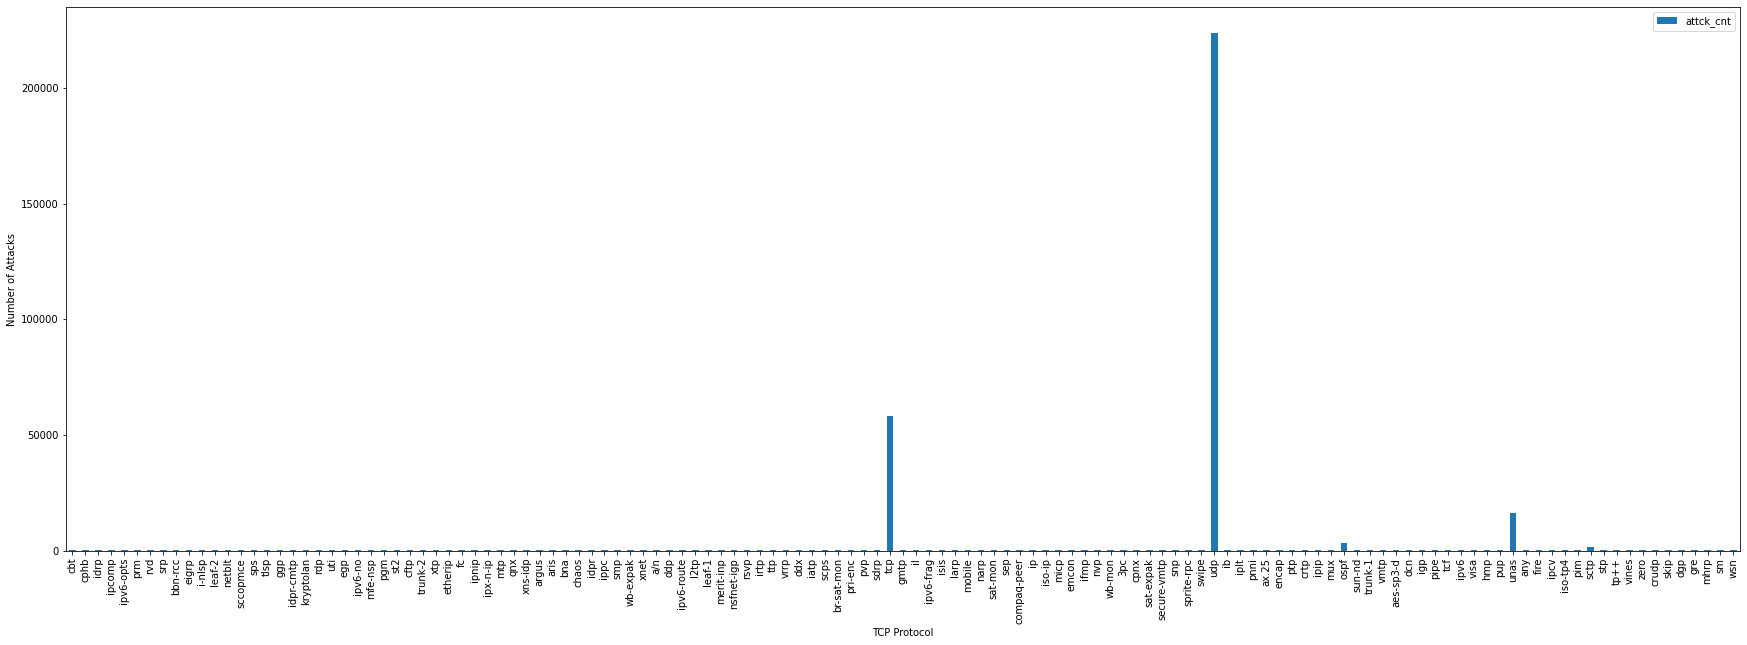

In [40]:
from matplotlib import pyplot as plt
ax=df.plot(kind="bar",x="proto",y="attck_cnt",figsize=(30, 10))
plt.xlabel("TCP Protocol")
plt.ylabel("Number of Attacks")
# Ref: https://www.cdata.com/kb/tech/hive-python-pandas.rst

In [43]:
# Query #2
df = pd.read_sql("select count(*) attck_cnt, attack_cat from unsw where length(attack_cat)>0 group by attack_cat", engine)
df.head()

,attck_cnt,attack_cat
0,19195,Fuzzers
1,223,Shellcode
2,16353,DoS
3,1288,Shellcode
4,5051,Fuzzers


Text(0, 0.5, 'Number of Attacks')

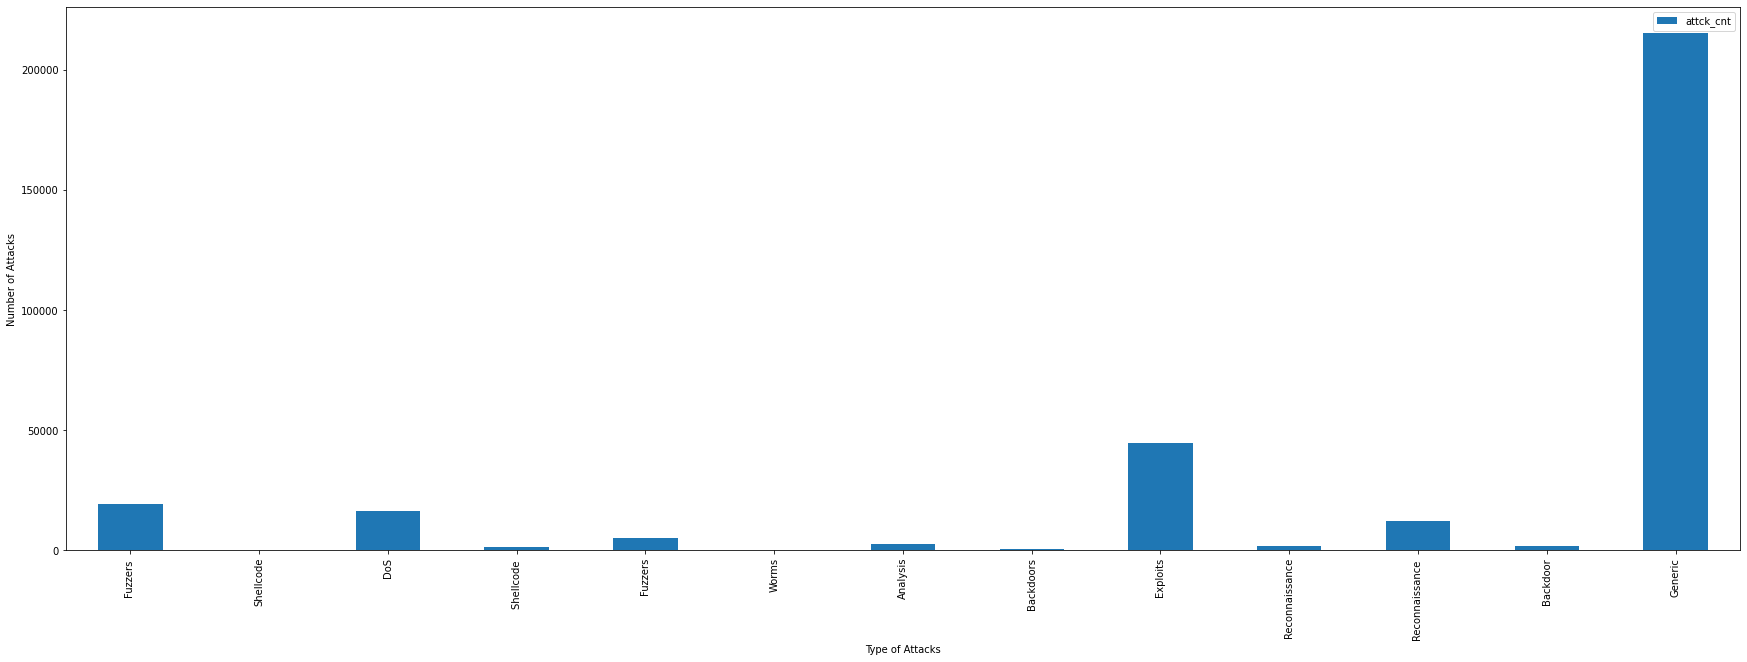

In [44]:
from matplotlib import pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
ax=df.plot(kind="bar",x="attack_cat",y="attck_cnt",figsize=(30, 10))
plt.xlabel("Type of Attacks")
plt.ylabel("Number of Attacks")
# Ref: https://www.cdata.com/kb/tech/hive-python-pandas.rst

In [51]:
# Query #3
df = pd.read_sql("SELECT count(*) attck_cnt, concat_ws('-',attack_cat,proto) as category FROM unsw where length(attack_cat)>0 GROUP BY attack_cat, proto", engine)
df.head()

,attck_cnt,category
0,4,Fuzzers-aes-sp3-d
1,6,Fuzzers -ax.25
2,6,Fuzzers -bbn-rcc
3,7,Reconnaissance -br-sat-mon
4,8,Analysis-cftp


Text(0, 0.5, 'Number of Attacks')

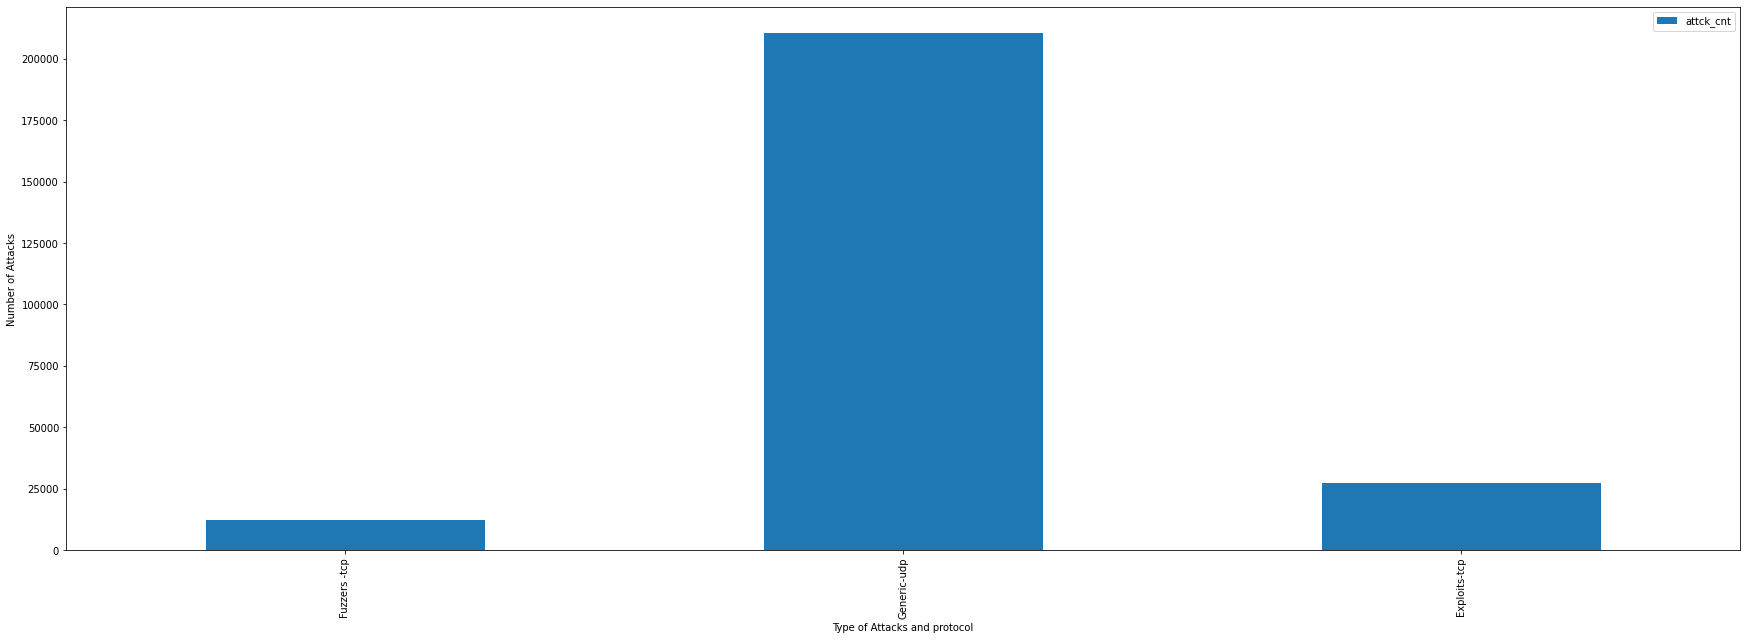

In [58]:
df=df[df['attck_cnt']>200]
ax=df.plot(kind="bar",x="category",y="attck_cnt",figsize=(30, 10))

plt.xlabel("Type of Attacks and protocol")
plt.ylabel("Number of Attacks")

In [65]:
# Query #4
df = pd.read_sql("select count(*)  total_cnt,sum(if(Label=binary('1'),1,0)) success_attk,service from unsw group by service", engine)
df.head()

,total_cnt,success_attk,service
0,1533,1529,pop3
1,81645,4989,smtp
2,125783,1890,ftp-data
3,206273,18847,http
4,781668,210631,dns


Text(0, 0.5, 'Success Rate')

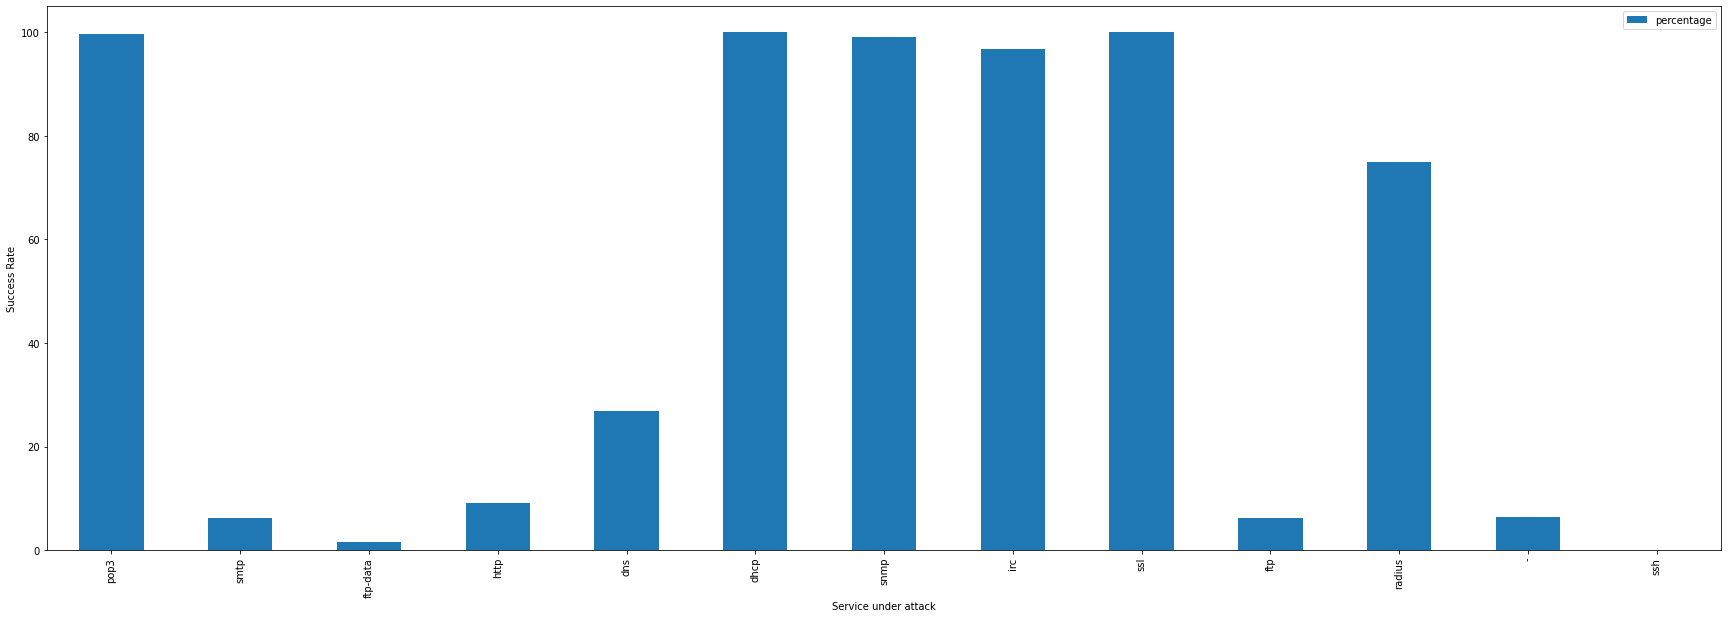

In [66]:
df['percentage']=df['success_attk']/df['total_cnt']*100
# df=df[df['percentage']<100]
ax=df.plot(kind="bar",x="service",y="percentage",figsize=(30, 10))

plt.xlabel("Service under attack")
plt.ylabel("Success Rate")

In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType,BinaryType, FloatType, TimestampType
from pyspark.sql.types import ArrayType, DoubleType, BooleanType
from pyspark.sql.functions import col,array_contains

spark=SparkSession.builder.master("local[1]").appName("examples.com").getOrCreate()
schema = StructType() \
      .add("srcip",StringType(),True) \
      .add("sport",IntegerType(),True) \
      .add("dstip",StringType(),True)\
    .add("dsport", IntegerType(),True)\
    .add("proto",StringType(),True)\
    .add("state",StringType(),True)\
    .add("dur",FloatType(),True)\
    .add("sbytes",IntegerType(),True)\
    .add("dbytes",IntegerType(),True) \
    .add("sttl",IntegerType(),True) \
    .add("dttl",IntegerType(),True) \
    .add("sloss",IntegerType(),True) \
    .add("dloss",IntegerType(),True) \
    .add("service",StringType(),True)\
    .add("Sload",FloatType(),True)\
    .add("Dload",FloatType(),True)\
    .add("Spkts",IntegerType(),True) \
    .add("Dpkts",IntegerType(),True) \
    .add("swin",IntegerType(),True) \
    .add("dwin",IntegerType(),True) \
    .add("stcpb",IntegerType(),True) \
    .add("dtcpb",IntegerType(),True) \
    .add("smeansz",IntegerType(),True) \
    .add("dmeansz",IntegerType(),True) \
    .add("trans_depth",IntegerType(),True) \
    .add("res_bdy_len",IntegerType(),True) \
    .add("Sjit",FloatType(),True)\
    .add("Djit",FloatType(),True)\
    .add("Stime",TimestampType(),True)\
    .add("Ltime",TimestampType(),True)\
    .add("Sintpkt",FloatType(),True)\
    .add("Dintpkt",FloatType(),True)\
    .add("tcprtt",FloatType(),True)\
    .add("synack",FloatType(),True)\
    .add("ackdat",FloatType(),True)\
    .add("is_sm_ips_ports",IntegerType(),True)\
    .add("ct_state_ttl",IntegerType(),True) \
    .add("ct_flw_http_mthd",IntegerType(),True) \
    .add("is_ftp_login",IntegerType(),True)\
    .add("ct_ftp_cmd",IntegerType(),True) \
    .add("ct_srv_src",IntegerType(),True) \
    .add("ct_srv_dst",IntegerType(),True) \
    .add("ct_dst_ltm",IntegerType(),True) \
    .add("ct_src_ltm",IntegerType(),True) \
    .add("ct_src_dport_ltm",IntegerType(),True) \
    .add("ct_dst_sport_ltm",IntegerType(),True) \
    .add("ct_dst_src_ltm",IntegerType(),True) \
    .add("attack_cat",StringType(),True)\
    .add("Label",IntegerType(),True)
rdd=spark.read.options(header=True).schema(schema).csv('hdoop/UNSW-NB15.csv')
rdd.printSchema()
rdd.show(5)

root
 |-- srcip: string (nullable = true)
 |-- sport: integer (nullable = true)
 |-- dstip: string (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: float (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: float (nullable = true)
 |-- Dload: float (nullable = true)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: integer (nullable = true)
 |-- dtcpb: integer (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_len: integer (nullable = true)
 |-

In [33]:
# Descriptive statistics
features=['dur','sbytes','dbytes','sttl','dttl','sloss','dloss','Sload','Dload']
summary=rdd.describe(features)

print("--------Sample summary")
summary.show()

print("--------Summary 2")
features=["swin","dwin","stcpb","dtcpb","smeansz","dmeansz","trans_depth","res_bdy_len"]
summary2=rdd.describe(features)
summary2.show()

print("--------Summary 3")
features=["Sjit","Djit","Stime","Ltime","Sintpkt","Dintpkt","tcprtt","synack","ackdat"]
summary3=rdd.describe(features)
summary3.show()

--------Sample summary
+-------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+-------------------+-----------------+
|summary|               dur|            sbytes|            dbytes|             sttl|              dttl|            sloss|             dloss|              Sload|            Dload|
+-------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+-------------------+-----------------+
|  count|           2539738|           2539738|           2539738|          2539738|           2539738|          2539738|           2539738|            2539738|          2539738|
|   mean|0.6588633348039957| 4340.070896289302| 36432.01927679154|62.78151053376372|30.770441675479912|5.164537444413558|16.331417650167065|3.694929380991353E7|2451159.341655907|
| stddev|13.925770377625211|56409.409186153316|161105.33522674238| 74.626711595676

AnalysisException: Column 'res_body_len' does not exist. Did you mean one of the following? [res_bdy_len, sbytes, ct_dst_ltm, ct_src_ltm, dbytes, is_ftp_login, Label, ct_ftp_cmd, ct_srv_dst, ct_srv_src, dsport, dttl, dwin, service, sloss, sport, state, sttl, swin, synack, trans_depth, Dload, Ltime, Sload, Stime, ackdat, attack_cat, ct_dst_sport_ltm, ct_dst_src_ltm, ct_src_dport_ltm, ct_state_ttl, dloss, dstip, dtcpb, dur, proto, smeansz, srcip, stcpb, Dintpkt, Djit, Dpkts, Sintpkt, Sjit, Spkts, dmeansz, tcprtt, is_sm_ips_ports, ct_flw_http_mthd];
'Project ['res_body_len]
+- Relation [srcip#0,sport#1,dstip#2,dsport#3,proto#4,state#5,dur#6,sbytes#7,dbytes#8,sttl#9,dttl#10,sloss#11,dloss#12,service#13,Sload#14,Dload#15,Spkts#16,Dpkts#17,swin#18,dwin#19,stcpb#20,dtcpb#21,smeansz#22,dmeansz#23,... 25 more fields] csv


In [112]:
import matplotlib.pyplot as plt 
from pyspark.sql.functions import mean
import pandas as pd
plt.style.use('ggplot') 

std=rdd.select(mean("sbytes")).collect()
print(std[0])
print("Meand:{}".format(summary['sbytes'][1]))

histd=rdd.select("sbytes").rdd.flatMap(lambda x: x).filter(lambda x: x>0).histogram(100)
print(histd)


hist_D=pd.DataFrame([(bins, counts) for bins, counts in zip( histd[0], histd[1] )],columns=['bins', 'counts'])
print(hist_D.head(20))

ax = hist_D.plot(kind='bar',x="bins",y="counts")
# plt.set_title('Dload Histogram')
plt.show()
# Visualization: 
# variants=["Dintpkt","Sintpkt", "Djit", "Sjit", "res_bdy_len", "Dload", "sbytes"]
# for s in variants:
#     rdd.select(s).rdd.flatMap(lambda x: x).histogram(8)

Row(avg(sbytes)=4340.070896289302)


AnalysisException: Cannot resolve column name "sbytes" among (stddev(sbytes))

KDE(dur)=[3.57663165e-01 3.64245962e-03 9.80698566e-04 3.33250038e-04
 3.92618498e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


Py4JJavaError: An error occurred while calling o3266.estimateKernelDensity.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 401.0 failed 1 times, most recent failure: Lost task 0.0 in stage 401.0 (TID 1756) (mungai-local executor driver): java.lang.ClassCastException

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:952)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2228)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2323)
	at org.apache.spark.rdd.RDD.$anonfun$aggregate$1(RDD.scala:1200)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.aggregate(RDD.scala:1193)
	at org.apache.spark.mllib.stat.KernelDensity.estimate(KernelDensity.scala:91)
	at org.apache.spark.mllib.api.python.PythonMLLibAPI.estimateKernelDensity(PythonMLLibAPI.scala:1077)
	at sun.reflect.GeneratedMethodAccessor286.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.lang.ClassCastException


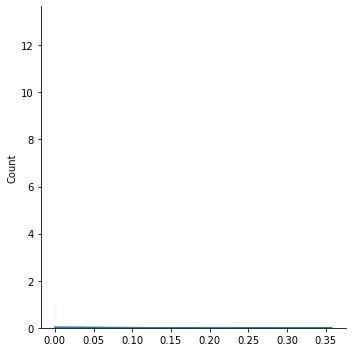

In [100]:
from pyspark.mllib.stat import KernelDensity
import seaborn as sns

features=['dur','sbytes','dbytes','sttl','dttl','sloss','dloss','Sload','Dload']

# Estimation at various points between minimum and maximum
estimationPoints=[0.0,5.0,10.0,30.0,50.0,100.0,300.0,500.0,1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0,9000.0, 1000000.0]
kd = KernelDensity()
dat_rdd = rdd.select(features[0]).rdd.map(lambda x: x[0])
kd.setSample(dat_rdd)
print("KDE({})={}".format(features[0],durEstimate))

# Iterate through the five airlines
for f in features:
    dat_rdd = rdd.select(f).rdd.map(lambda x: x[0])
    kd = KernelDensity()
    kd.setSample(dat_rdd)
    # Subset to the airline
    kdeEstimate=kd.estimate(estimationPoints)
    # Draw the density plot
    try:
        sns.displot(kdeEstimate,kde = True,
                     label = f)
    except:
        print("Failed")
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Features')
plt.title('Density Plot with Various fields')
plt.xlabel('Variation')
plt.ylabel('Density')


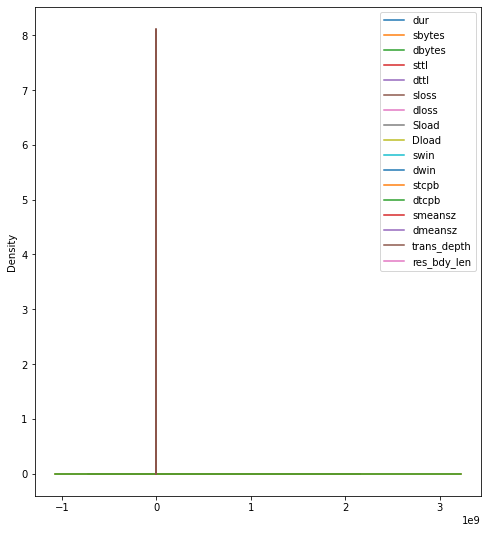

In [89]:
import pandas as pd
from matplotlib import pyplot as plt
features=['dur','sbytes','dbytes','sttl','dttl','sloss','dloss','Sload','Dload',"swin","dwin","stcpb","dtcpb","smeansz","dmeansz","trans_depth","res_bdy_len"]
df = rdd.select(features).limit(20000).toPandas()
ax=df.plot.kde(bw_method='silverman',figsize=(8,9)) 



In [57]:
from pyspark.ml.stat import KolmogorovSmirnovTest
ksResult = KolmogorovSmirnovTest.test(rdd, 'sttl', 'norm', 0.05, 1.0).first()
print(ksResult)
print("P-VALUE={}".format(ksResult.pValue))
print("Statisitcs={}".format(ksResult.statistics))

Row(pValue=8.381000893287194e-09, statistic=0.994106872441173)


In [100]:
from pyspark.ml.stat import ChiSquareTest
from pyspark.mllib.stat import Statistics
from pyspark.mllib import linalg as ln
features=["service","proto"]
for f in features:
    rdd_column=(rdd.groupby("label").pivot(f).count())
    print(rdd_column.show(5))
    rdd_data=(rdd_column.rdd.map(lambda row:(row[2:])).flatMap(lambda x: x or 0.0).collect())
    len_data=rdd_column.count()
    print(len_data)
    ccol = len(rdd_column.columns)
    dens_mtx=ln.DenseMatrix(len_data,ccol-2,rdd_data,True)
    chiResult=Statistics.chiSqTest(dens_mtx)
    print("==============={}===================".format(f))
    print(chiResult)
#chiResult=ChiSquareTest.test(rdd,'sttl','label',True)
#print(chiResult)

+-----+-------+----+------+-----+--------+------+---+----+------+-----+----+-----+----+
|label|      -|dhcp|   dns|  ftp|ftp-data|  http|irc|pop3|radius| smtp|snmp|  ssh| ssl|
+-----+-------+----+------+-----+--------+------+---+----+------+-----+----+-----+----+
|    1|  79877| 172|210631| 3015|    1890| 18847| 30|1529|    30| 4989| 112|   19| 142|
|    0|1166211|null|571037|46075|  123893|187426|  1|   4|    10|76656|   1|47141|null|
+-----+-------+----+------+-----+--------+------+---+----+------+-----+----+-----+----+

None
2
===============service===================
Chi squared test summary:
method: pearson
degrees of freedom = 11 
statistic = NaN 
pValue = NaN 
No presumption against null hypothesis: the occurrence of the outcomes is statistically independent..
+-----+----+----+---------+----+-----+----+-----+-----+-------+----+----------+----+----+-----+-----------+----+----+----+-----+----+----+----+----+----+-----+-----+-----+-------+----+----+----+----+----+----+------+----+-

In [5]:
features1=['dur','sbytes','dbytes','sttl','dttl','sloss','dloss','Sload','Dload',"swin","dwin","stcpb","dtcpb",]
features2=["smeansz","dmeansz","trans_depth","res_bdy_len","Sjit","Djit","Sintpkt","Dintpkt","tcprtt","synack","ackdat"]
corr=[]
features=features1+features2
n_features=len(features)
for i in range(0,n_features):
    tmp=[None]*i
    for j in range(i,n_features):
       tmp.append(rdd.corr(features[i],features[j]))
    corr.append([features[i]]+tmp)

==============F1=======


TypeError: Parameter 'n' (number of rows) must be an int

In [29]:
from pyspark.sql.functions import when
import pyspark.sql.functions as func

correlations=spark.createDataFrame(corr,['Column']+features)
print("==============F1=======")
correlations.select(['Column']+features[0:8]).show(n_features)

print("==============F2=======")
correlations.select(['Column']+features[8:16]).show(n_features)

print("==============F3=======")
correlations.select(['Column']+features[16:]).show(n_features)



==============F1=======
+-------------+----+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|       Column| dur|             sbytes|             dbytes|                sttl|                dttl|               sloss|               dloss|               Sload|
+-------------+----+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|        [dur]| 1.0|0.03326868976487904|0.08696993591009966|-0.00365315973738...|0.010704417326788045| 0.04149207321908868| 0.08771179946821238|-0.01471325907848...|
|     [sbytes]|null|                1.0|0.04702553600345173|-0.00892461338882...| 0.06641966377471746|  0.9534935536274581| 0.05118081700611087|-0.02098714202211...|
|     [dbytes]|null|               null|                1.0|-0.09418031873790116|0.009103726537922293| 0.11553012016015303|  0.9913421224069423|-0

In [28]:
# Round of the values for easy comparison
cdf=correlations
for col in features:
    cdf=cdf.withColumn(col,when(cdf[col]==None,0.00)
                                        .otherwise(func.round(cdf[col], 3)))
print("==============ALL=======")
cdf.select(['Column']+features).show(n_features)

# Find Highly correlated fields
for col in features:
    cdf=cdf.withColumn(col,when(cdf[col]>0.8,'PV')
                                         . when(cdf[col]>0.4,'PH')
                                         .when(cdf[col]>0,'PL')
                                         .when(cdf[col]>-0.4,'NL')
                                         .when(cdf[col]>-0.5,'NH')
                                         .when(cdf[col]>-1.0,'NV')
                                        .otherwise("-"))


print("==============CATEGORIZED=======")
cdf.select(['Column']+features).show(n_features)


==============ALL=======
+-------------+----+------+------+------+-----+------+------+------+------+------+------+------+------+-------+-------+-----------+-----------+------+------+-------+-------+------+------+------+
|       Column| dur|sbytes|dbytes|  sttl| dttl| sloss| dloss| Sload| Dload|  swin|  dwin| stcpb| dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|  Sjit|  Djit|Sintpkt|Dintpkt|tcprtt|synack|ackdat|
+-------------+----+------+------+------+-----+------+------+------+------+------+------+------+------+-------+-------+-----------+-----------+------+------+-------+-------+------+------+------+
|        [dur]| 1.0| 0.033| 0.087|-0.004|0.011| 0.041| 0.088|-0.015|-0.023| 0.011| 0.011| 0.005| 0.004| -0.003|  0.036|      0.017|      0.044| 0.033| 0.048|  0.072|  0.097| 0.011| 0.011|  0.01|
|     [sbytes]|null|   1.0| 0.047|-0.009|0.066| 0.953| 0.051|-0.021|-0.007|  0.06|  0.06| 0.026| 0.026|  0.188|  0.016|        0.0|      0.021| 0.001| 0.001| -0.005| -0.003| 0.027| 0.024| 0.027|


In [12]:
from pyspark.ml import classification as cl
from pyspark.ml import feature as feat
from pyspark.sql.functions import when
import pyspark.sql.functions as func

# Merge multiple columns into single column
assembler=feat.VectorAssembler(
    inputCols=['dur','sbytes','dbytes','sttl','dttl','sloss','dloss','Sload','Dload',"swin","dwin","stcpb","dtcpb","smeansz","dmeansz","trans_depth","res_bdy_len","Sjit","Djit","Sintpkt","Dintpkt","tcprtt","synack","ackdat"],
    outputCol='features',
    handleInvalid='skip'
)
# Split into training set
splits = rdd.randomSplit([0.7, 0.3])
train_set = splits[0]
test = splits[1]
train_set.show()

+-----------+-----+-----------+------+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+----+----+-----+-----+--------+-------+------+------+------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|      srcip|sport|      dstip|dsport|proto|state|dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|Sload|Dload|Spkts|Dpkts|swin|dwin|stcpb|dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|Sjit|Djit|Stime|Ltime| Sintpkt|Dintpkt|tcprtt|synack|ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|
+-----------+-----+-----------+------+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-----+-----+------

In [13]:
nt_dasets=assembler.transform(train_set).withColumn('label',(func.col('label')==1).cast('integer')).select('label','features')
nt_dasets.show()
nt_svc=cl.LinearSVC(maxIter=10, regParam=0.01)
nt_svc_model=nt_svc.fit(nt_dasets)
print(nt_svc_model)
# Print summary
gbtModel = nt_svc_model.stages[1]
print(gbtModel)  # summary only

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13,19],[46...|
+-----+--------------------+
only showing top 20 rows

LinearSVCModel: uid=LinearSVC_6e4baa75cf6b, numClasses=2, numFeatures=24


In [18]:
# Perform predictions on the test data
nt_test_dasets=assembler.transform(test).withColumn('label',(func.col('label')==1).cast('integer')).select('label','features')
predictions=nt_svc_model.transform(nt_test_dasets)
predictions.select("prediction","label","features").show(5)

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|    0|(24,[1,13],[46.0,...|
|       0.0|    0|(24,[1,13],[46.0,...|
|       0.0|    0|(24,[1,13],[46.0,...|
|       0.0|    0|(24,[1,13],[46.0,...|
|       0.0|    0|(24,[1,13],[46.0,...|
+----------+-----+--------------------+
only showing top 5 rows



In [19]:
from pyspark.ml.evaluation import RegressionEvaluator
# Evaluate the performance of our model using RMSE
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.12564


NameError: name 'model' is not defined

In [30]:
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml import Pipeline

ntr_datasets=assembler.transform(train_set).withColumn('label',(func.col('label')==1).cast('integer')).select('label','features')
#featureIndexer =feat.VectorIndexer(inputCol="features", outputCol="prediction", maxCategories=2).fit(ntr_datasets)
lr = LogisticRegression(featuresCol="features",labelCol='label')
# pipeline = Pipeline(stages=[featureIndexer, rf])
ovr=OneVsRest(classifier=lr)
lr_model=ovr.fit(ntr_datasets)
print(lr_model)

OneVsRestModel_0c58249f9f25


In [32]:
print(ntr_datasets.show(10))

# Perform predictions on the test data
nt_test_dasets=assembler.transform(test).withColumn('label',(func.col('label')==1).cast('integer')).select('label','features')
predictions=lr_model.transform(nt_test_dasets)
predictions.select("prediction","label","features").show(5)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
|    0|(24,[1,13],[46.0,...|
+-----+--------------------+
only showing top 10 rows

None
+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|    0|(24,[1,13],[46.0,...|
|       0.0|    0|(24,[1,13],[46.0,...|
|       0.0|    0|(24,[1,13],[46.0,...|
|       0.0|    0|(24,[1,13],[46.0,...|
|       0.0|    0|(24,[1,13],[46.0,...|
+----------+-----+--------------------+
only showing top 5 rows



In [33]:
# Evaluate the performance of our model using RMSE
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) Logistic Regresion = %g" % rmse)

Root Mean Squared Error (RMSE) Logistic Regresion = 0.107343


In [37]:
from pyspark.ml.clustering import KMeans

kmean = KMeans()
kmean.setK(10) # Set the number of classes ort centroids
kmean.setSeed(33) # Make initialization to be deterministic
# Transform the data to create a vector
cluster_datasets=assembler.transform(train_set).withColumn('label',(func.col('label')==1).cast('integer')).select('label','features')

model = kmean.fit(cluster_datasets)
print(model.clusterCenters())

[array([4.87496070e-01, 4.28598146e+02, 1.57521163e+03, 9.27551238e+01,
       1.56329460e+01, 2.00940380e-01, 6.54665120e-01, 7.27648636e+07,
       4.12865454e+05, 6.18974615e+00, 5.48698559e+00, 1.57126369e+06,
       1.78446811e+06, 9.48962187e+01, 5.34263612e+01, 3.08050976e-03,
       1.71745159e+02, 9.15077611e+01, 6.17155357e+01, 4.22120873e+02,
       1.47357396e+02, 5.55348485e-05, 3.62240660e-05, 1.93107826e-05]), array([7.17961859e-01, 6.39299185e+03, 6.40067480e+04, 3.43322891e+01,
       3.34688773e+01, 8.84769764e+00, 2.88955022e+01, 1.18242125e+06,
       4.25392201e+06, 2.55000000e+02, 2.54922066e+02, 1.95670831e+09,
       1.97272856e+09, 1.36437194e+02, 4.52588223e+02, 1.40153830e-01,
       6.97894654e+03, 1.90101862e+03, 1.20210651e+03, 1.95312626e+01,
       1.72819539e+01, 4.18716722e-03, 2.30952911e-03, 1.87763812e-03]), array([7.60686857e-01, 7.31146900e+03, 6.39223173e+04, 3.72692108e+01,
       3.73906023e+01, 9.01077362e+00, 2.86674455e+01, 1.13746462e+06,
 

In [40]:
from pyspark.ml.evaluation import ClusteringEvaluator
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

test_datasets=assembler.transform(test).withColumn('label',(func.col('label')==1).cast('integer')).select('label','features','attack_cat')
predictions=model.transform(test_datasets)
predictions.show(20)


Cluster Centers: 
[4.87496070e-01 4.28598146e+02 1.57521163e+03 9.27551238e+01
 1.56329460e+01 2.00940380e-01 6.54665120e-01 7.27648636e+07
 4.12865454e+05 6.18974615e+00 5.48698559e+00 1.57126369e+06
 1.78446811e+06 9.48962187e+01 5.34263612e+01 3.08050976e-03
 1.71745159e+02 9.15077611e+01 6.17155357e+01 4.22120873e+02
 1.47357396e+02 5.55348485e-05 3.62240660e-05 1.93107826e-05]
[7.17961859e-01 6.39299185e+03 6.40067480e+04 3.43322891e+01
 3.34688773e+01 8.84769764e+00 2.88955022e+01 1.18242125e+06
 4.25392201e+06 2.55000000e+02 2.54922066e+02 1.95670831e+09
 1.97272856e+09 1.36437194e+02 4.52588223e+02 1.40153830e-01
 6.97894654e+03 1.90101862e+03 1.20210651e+03 1.95312626e+01
 1.72819539e+01 4.18716722e-03 2.30952911e-03 1.87763812e-03]
[7.60686857e-01 7.31146900e+03 6.39223173e+04 3.72692108e+01
 3.73906023e+01 9.01077362e+00 2.86674455e+01 1.13746462e+06
 4.06648197e+06 2.55000000e+02 2.54967212e+02 9.44572499e+08
 9.62778474e+08 1.41193458e+02 4.44938733e+02 1.40628245e-01
 8.0

In [42]:
# Evaluate cluster performance
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.8235853494344024


In [43]:
# View the counts in each group
predictions.groupBy("prediction").count().show(20)

+----------+------+
|prediction| count|
+----------+------+
|         1| 16760|
|         6| 17548|
|         3|  2816|
|         5| 16943|
|         9|  1958|
|         4| 16587|
|         8|  4431|
|         7| 15945|
|         2| 16656|
|         0|316127|
+----------+------+



In [45]:
test_datasets.groupBy("attack_cat").count().show()

+---------------+------+
|     attack_cat| count|
+---------------+------+
|          Worms|    20|
|           null|342445|
|       Analysis|   657|
|     Shellcode |   247|
|            DoS|  4218|
|Reconnaissance |  2296|
|       Backdoor|   489|
|       Fuzzers |  3011|
|       Exploits|  7125|
|        Generic| 63950|
|      Shellcode|    51|
|      Backdoors|   153|
|        Fuzzers|   803|
| Reconnaissance|   306|
+---------------+------+

